In [1]:
%matplotlib inline
import os
os.chdir("../")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
import json
from src import utils
from IPython.display import clear_output
import pickle
from collections import Counter


In [ ]:
#Auxiliary functions to get the tokenization counts

def get_unique_and_counts(numbers):
    # Use Counter to count occurrences
    occurrences = Counter(numbers)
    
    # Sort the unique numbers and their counts
    unique_numbers = sorted(occurrences.keys())
    counts = [occurrences[number] for number in unique_numbers]
    
    return unique_numbers, counts

def align(lengths, l, c):
    counts= [0] * len(lengths)
    
    
    for i in range(len(lengths)):
        
        
        if lengths[i] in l:
            
            
            counts[i] = c[l.index(lengths[i])]

    return counts

In [ ]:
#Read the data generated using the src/tokenizations_fixed_plausible.py script

with open("../outputs/fixed_string/Llama/total_tok.pkl", "rb") as f:
    tok = pickle.load(f)
    tok = [len(i) for i in tok]

with open("../outputs/fixed_string/Llama/plaussibility_p0.95_k2000_maxlength13_multi language models.pkl", "rb") as f:
    tok_095_2000 = pickle.load(f)
    tok_095= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_p_met"]==True]
    tok__2000= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_k_met"]==True]
    
with open("../outputs/fixed_string/Llama/plaussibility_p0.99_k5000_maxlength13_multi_language models.pkl", "rb") as f:
    tok_099_5000 = pickle.load(f)
    tok_099= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_p_met"]==True]
    tok__5000= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_k_met"]==True]
    
with open("../outputs/fixed_string/Llama/plaussibility_p0.9_k2000_maxlength13_multi_language models.pkl", "rb") as f:
    tok_09 = pickle.load(f)
    tok_09= [len(i[0]) for i in tok_09 if i[1]["all_top_p_met"]==True]
    

    
#Get the unique lengths and counts for each tokenization
lengths, counts = get_unique_and_counts(tok)
lengths_095, counts_095 = get_unique_and_counts(tok_095)
lengths_099, counts_099 = get_unique_and_counts(tok_099)
lengths_09, counts_09 = get_unique_and_counts(tok_09)
lengths__2000, counts__2000 = get_unique_and_counts(tok__2000)
lengths__5000, counts__5000 = get_unique_and_counts(tok__5000)

counts_09 = align(lengths, lengths_09, counts_09)
counts_095 = align(lengths, lengths_095, counts_095)
counts_099 = align(lengths, lengths_099, counts_099)

counts__2000 = align(lengths, lengths__2000, counts__2000)
counts__5000 = align(lengths, lengths__5000, counts__5000)


#Create dataframe
df = pd.DataFrame({"lengths": lengths, "counts": counts,"counts_09" : counts_09, "counts_095": counts_095, "counts_099": counts_099, "counts__2000": counts__2000, "counts__5000": counts__5000})


df_long_p = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_099','counts_09' ],  var_name='class', value_name='y')
df_long_k = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts__5000', 'counts__2000'],  var_name='class', value_name='y')


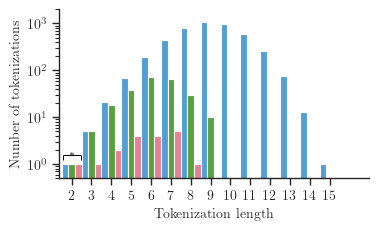

In [ ]:

#Plot the histogram

sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))


# draw axis
sns.barplot(data=df_long_p, x="lengths",y="y",hue="class", palette=[palette[2], palette[1], palette[0]], ax=ax, width=1, legend=False)   


plt.hlines(y=1.6, xmin=-0.45, xmax=0.45, colors='black', linewidth=0.7)
plt.vlines(x=-0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=1.2 ,ymax=1.6, colors='black', linewidth=0.7)
plt.text(-0.13,1.5,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,15])
ax.set_ylim([0.5,2*10**3])

sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
#fig.savefig('../figures/fixed_string/hist_fixed_string_topp_llm.pdf', dpi=300)

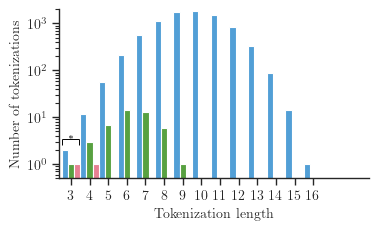

In [ ]:

# Function to get unique numbers and their counts
def get_unique_and_counts(numbers):
    # Use Counter to count occurrences
    occurrences = Counter(numbers)
    
    # Sort the unique numbers and their counts
    unique_numbers = sorted(occurrences.keys())
    counts = [occurrences[number] for number in unique_numbers]
    
    return unique_numbers, counts

def align(lengths, l, c):
    counts= [0] * len(lengths)
    
    
    for i in range(len(lengths)):
        
        
        if lengths[i] in l:
            
            
            counts[i] = c[l.index(lengths[i])]

    return counts

with open("../outputs/fixed_string/Llama/tokenizations_fixed_causal inference.pkl", "rb") as f:
    tok = pickle.load(f)
    tok = [len(i) for i in tok]

with open("../outputs/fixed_string/Llama/plaussibility_p0.95_kNone_maxlength13_multi_causal inference.pkl", "rb") as f:
    tok_095_2000 = pickle.load(f)
    tok_095= [len(i[0]) for i in tok_095_2000 if i[1]["all_top_p_met"]==True]
    
with open("../outputs/fixed_string/Llama/plaussibility_p0.99_kNone_maxlength13_multi_causal inference.pkl", "rb") as f:
    tok_099_5000 = pickle.load(f)
    tok_099= [len(i[0]) for i in tok_099_5000 if i[1]["all_top_p_met"]==True]

    

lengths, counts = get_unique_and_counts(tok)
lengths_095, counts_095 = get_unique_and_counts(tok_095)
lengths_099, counts_099 = get_unique_and_counts(tok_099)


counts_095 = align(lengths, lengths_095, counts_095)
counts_099 = align(lengths, lengths_099, counts_099)



#Create dataframe
df = pd.DataFrame({"lengths": lengths, "counts": counts, "counts_095": counts_095, "counts_099": counts_099})


df_long_p = pd.melt(df, id_vars=['lengths'], value_vars=['counts', 'counts_099','counts_095' ],  var_name='class', value_name='y')


sns.set_theme(context='paper', style='ticks', font_scale=1)
name="test"
width_pt = 469

palette = sns.color_palette('husl', 3)
permuted_palette = [palette[2], palette[0], palette[1]] 

utils.latexify() # Computer Modern, with TeX



fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# draw axis
sns.barplot(data=df_long_p, x="lengths",y="y",hue="class", palette=[palette[2], palette[1], palette[0]], ax=ax, width=1, legend=False)   



plt.hlines(y=3.5, xmin=-0.45, xmax=0.45, colors='black', linewidth=0.7)
plt.vlines(x=-0.45, ymin=2.6 ,ymax=3.5, colors='black', linewidth=0.7)
plt.vlines(x=0.45, ymin=2.6 ,ymax=3.5, colors='black', linewidth=0.7)
plt.text(-0.13,3.4,"*", color="black", fontsize=8)

ax.set_xlim([-0.65,16])
ax.set_ylim([0.5,2*10**3])



sns.despine(ax=ax)
ax.set_yscale("log")
ax.set_xlabel(r"Tokenization length")
ax.set_ylabel("Number of tokenizations")

fig.tight_layout()
plt.show()
#fig.savefig('../figures/fixed_string/hist_fixed_string_topp_causal_inference.pdf', dpi=300)

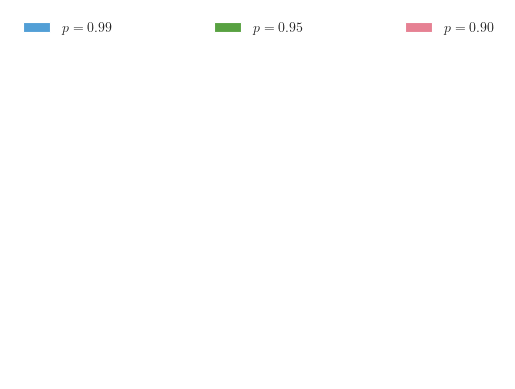

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the first plot (hidden)
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

sns.barplot(
    data=df_long_k,
    x="lengths",
    y="y",
    hue="class",
    palette=[palette[2], palette[1], palette[0]],
    ax=ax,
    width=1,
    legend=True
)

# Extract legend information
handles, labels = ax.get_legend_handles_labels()

# Suppress the first plot's display
plt.close(fig)

# Generate the second plot (visible)
fig, axe = plt.subplots(1)
axe.legend(
    handles=handles,
    labels=[r"$p=0.99$", r"$p=0.95$", r"$p=0.90$"],
    loc="upper right",
    mode="expand",
    ncol=3,
    frameon=False
)

# Hide axes and spines
axe.xaxis.set_visible(False)
axe.yaxis.set_visible(False)
for v in axe.spines.values():
    v.set_visible(False)

# Show the resulting figure
plt.show()